# House Prices

This notebook uses data from the Ames Housing dataset found in a Kaggle competition 
entitled House Prices - Advanced Regression Techniques.  The data set has 79 expanatory variables that 
may be used to predict the price of the home. Key challenges are feature selection and feature engineering.
It is a regression problem with the opportunity to test advanced regression techniques.
https://kaggle.com/competitions/house-prices-advanced-regression-techniques

Note: this notebook is currently being revised.

### Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

### Data Access

Kaggle Datasets (missing target for test data)

In [2]:
train_data = pd.read_csv("https://raw.githubusercontent.com/TedMcG7/githubmain/main/datasets/housing-train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/TedMcG7/githubmain/main/datasets/housing-test.csv")

In [3]:
X_train = train_data.drop('SalePrice', axis=1)
y_train = train_data['SalePrice']

### Data Exploration

Data Cleaning

In [4]:
def prepare(data):
    clear = ['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'LotFrontage']
    data = data.drop(clear, axis=1)
    garage_columns = ['GarageType','GarageFinish','GarageQual','GarageCond'] 
    data[garage_columns] = data[garage_columns].fillna('NA')
    data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['YearBuilt'])
    data['GarageYrBlt'] = data['GarageYrBlt'].astype('int64')
    basement_columns =  ['BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2']
    data[basement_columns] = data[basement_columns].fillna('NA')
    data['Electrical'] = data['Electrical'].fillna('SBrkr')
    data['MasVnrType'] = data['MasVnrType'].fillna('None')
    data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
    data['MedNhbdArea'] = data.groupby('Neighborhood')['GrLivArea'].transform('median').astype('int64')
    qual = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
    data[qual] = data[qual].replace('Ex', 5).replace('Gd', 4).replace('TA', 3).replace('Fa', 2).replace('Po', 1).replace('NA', 0)
    bsmt = ['BsmtFinType1','BsmtFinType2']
    data[bsmt] = data[bsmt].replace('GLQ', 6).replace('ALQ', 5).replace('BLQ', 4).replace('Rec', 3).replace('LwQ', 2).replace('Unf', 1).replace('NA', 0)
    return data

In [5]:
df = prepare(train_data)

In [6]:
# data.hist(bins=50, figsize=(20,15))
# plt.show()

Mutual Information (for feature selection)

In [7]:
from sklearn.feature_selection import mutual_info_regression

In [8]:
X = df.drop('SalePrice', axis=1)
y = df.SalePrice

In [9]:
X.select_dtypes('object')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,BsmtExposure,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,No,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Gd,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Mn,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,No,GasA,Y,SBrkr,Typ,Detchd,Unf,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Av,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,No,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,No,GasA,Y,SBrkr,Min1,Attchd,Unf,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,No,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Mn,GasA,Y,FuseA,Typ,Attchd,Unf,Y,WD,Normal


In [10]:
X.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MedNhbdArea
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,1500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,1437
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,1500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,1717
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,2418


In [19]:
# This code tranforms categorical features into discrete features with interger dtypes.
# From Mutual Information course in Kaggle.

for colname in X.select_dtypes('object'):
    X[colname], _ = X[colname].factorize()

In [50]:
X.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MedNhbdArea
0,60,0,8450,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,1500
1,20,0,9600,0,0,0,0,1,0,1,...,0,0,0,0,0,5,2007,0,0,1437
2,60,0,11250,0,1,0,0,0,0,0,...,0,0,0,0,0,9,2008,0,0,1500
3,70,0,9550,0,1,0,0,2,0,2,...,272,0,0,0,0,2,2006,0,1,1717
4,60,0,14260,0,1,0,0,1,0,3,...,0,0,0,0,0,12,2008,0,0,2418


In [62]:
# This checks whether discrete features have interger dtypes.

discrete_features = X.dtypes == 'int64'
discrete_features

MSSubClass       True
MSZoning         True
LotArea          True
Street           True
LotShape         True
                 ... 
MoSold           True
YrSold           True
SaleType         True
SaleCondition    True
MedNhbdArea      True
Length: 74, dtype: bool

In [60]:
# From Mutual Information course in Kaggle.

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

OverallQual      5.661161e-01
GarageArea       4.938890e-01
TotalBsmtSF      3.974889e-01
BsmtQual         3.348006e-01
GarageYrBlt      3.232665e-01
YearRemodAdd     2.778339e-01
GarageType       2.109033e-01
OpenPorchSF      1.911433e-01
Fireplaces       1.673177e-01
BsmtFinType1     1.571818e-01
BsmtUnfSF        1.281108e-01
MasVnrType       9.880960e-02
HouseStyle       8.682993e-02
HalfBath         7.831061e-02
BedroomAbvGr     7.365788e-02
BsmtCond         5.407463e-02
BldgType         4.427931e-02
BsmtFullBath     2.704567e-02
EnclosedPorch    2.225487e-02
RoofStyle        1.866203e-02
BsmtHalfBath     1.135051e-02
Functional       6.379865e-03
Condition2       2.657704e-03
Utilities        1.887379e-15
YrSold           0.000000e+00
Name: MI Scores, dtype: float64

In [63]:
def select(X): 
    keep = mi_scores[0:50].index.tolist() 
    X = X[keep]
    # X = np.ascontiguousarray(X)
    return X

In [64]:
X = select(X)

In [65]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   int64  
 1   Neighborhood   1460 non-null   int64  
 2   MedNhbdArea    1460 non-null   int64  
 3   GarageArea     1460 non-null   int64  
 4   GrLivArea      1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   TotalBsmtSF    1460 non-null   int64  
 7   LotArea        1460 non-null   int64  
 8   GarageCars     1460 non-null   int64  
 9   BsmtQual       1460 non-null   int64  
 10  ExterQual      1460 non-null   int64  
 11  KitchenQual    1460 non-null   int64  
 12  GarageYrBlt    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  MSSubClass     1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  FullBath       1460 non-null   int64  
 17  GarageFinish   1460 non-null   int64  
 18  GarageTy

In [ ]:
# corr = df.corr()['SalePrice'].drop('SalePrice')

In [ ]:
# df_measures = pd.DataFrame({'mi_score': mi_scores, 'corr': corr})

In [ ]:
# df_sorted = df_measures.sort_values('mi_score', ascending=False).reset_index()

In [ ]:
# df_selected = df_sorted.loc[0:50,:]

In [ ]:
# df_selected

In [ ]:
# df = df[df_selected['index']]

Data Visualization - Seaborn

<AxesSubplot:>

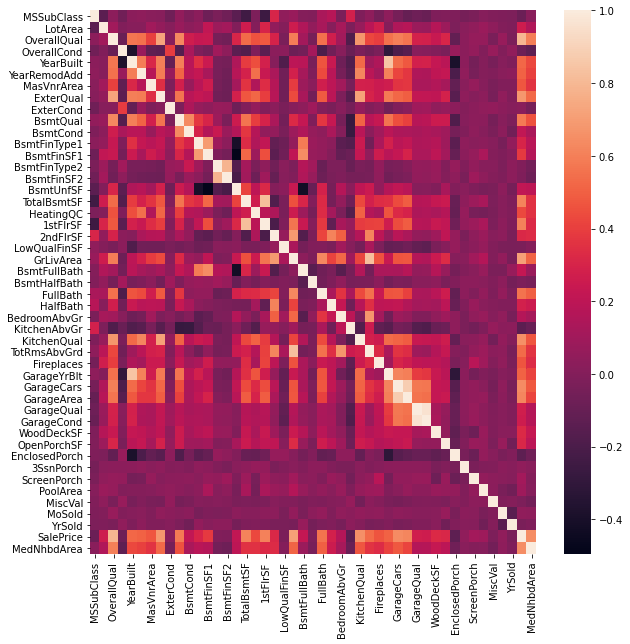

In [66]:
plt.figure(figsize=(10,10))
sn.heatmap(df.corr())

Data Visualization - Matplotlib

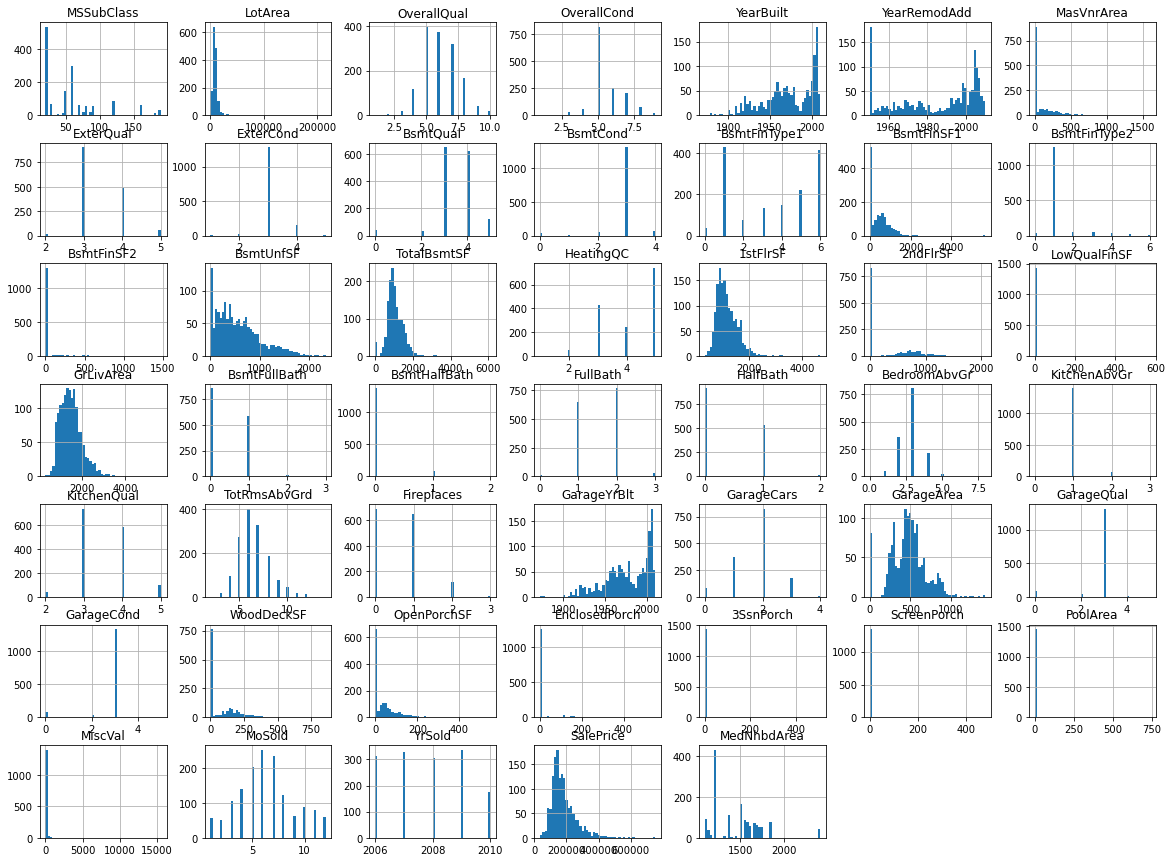

In [67]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Data Preparation

In [269]:
X_train = df.drop('SalePrice', axis=1)
y_train = df['SalePrice']

Pipelines

In [270]:
# Transformation pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [ ]:
# num_attribs = []
# for colname in X_train.select_dtypes('int64','float64'):
#    num_attribs.append(colname)

In [ ]:
# num_attribs

In [ ]:
# cat_attribs = []
# for colname in X_train.select_dtypes('object'):
#    cat_attribs.append(colname)

In [ ]:
# cat_attribs

In [ ]:
# Column transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown='error'), cat_attribs),  
    ])

In [271]:
X_train = num_pipeline.fit_transform(X)

In [ ]:
# X = np.ascontiguousarray(X)

### Model Selection

In [272]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

In [273]:
from sklearn.model_selection import cross_val_score

In [274]:
# Testing various classifiers using defaults
from sklearn.model_selection import cross_val_score
regressors = []
regressors.append(LinearRegression())
regressors.append(SVR())
regressors.append(DecisionTreeRegressor())
regressors.append(RandomForestRegressor())
regressors.append(ExtraTreesRegressor())
regressors.append(GradientBoostingRegressor())
regressors.append(XGBRegressor())


cv_results = []
for regressor in regressors:
    cv_results.append(cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_log_error', cv=5, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({'Algorithm':['LinearRegression','SVR','DecisionTree','RandomForest','ExtraTrees',\
                                    'GradientBoosting', 'XGB'],\
                       'Mean':cv_means,"Std": cv_std})


In [275]:
cv_res.head(20).sort_values('Mean', ascending=False)

,Algorithm,Mean,Std
5,GradientBoosting,-0.017136,0.003398
6,XGB,-0.018889,0.001526
4,ExtraTrees,-0.018951,0.003052
3,RandomForest,-0.020805,0.002832
2,DecisionTree,-0.042479,0.004944
1,SVR,-0.159818,0.013224
0,LinearRegression,NaN,NaN


### Model Tuning

In [276]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [277]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring = 'neg_mean_squared_log_error', n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Gradient Boosting

In [278]:
gb_reg = GradientBoostingRegressor()
score = cross_val_score(gb_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_log_error')
score.mean()

-0.01726232910450437

In [279]:
param_grid = {'n_estimators': [50, 100, 250], 'max_depth': [2, 3, 4], 'learning_rate': [0.1, 0.5, 1]}
grid_search = GridSearchCV(gb_reg, param_grid, cv=5, scoring = 'neg_mean_squared_log_error') 
grid_search.fit(X_train,y_train)
grid_search.best_params_

C:\Users\tedmc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tedmc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\tedmc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\tedmc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\tedmc\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\tedmc\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 413, in mean_squared_log_error
    raise ValueE

C:\Users\tedmc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tedmc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\tedmc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\tedmc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\tedmc\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\tedmc\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 413, in mean_squared_log_error
    raise ValueE

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 250}

In [280]:
grid_search.best_score_

-0.016889834799290328

In [282]:
from sklearn.metrics import mean_squared_log_error

gb_reg = GradientBoostingRegressor(max_depth=1, n_estimators=250, learning_rate=0.1)
gb_reg.fit(X_train,y_train)
y_train_pred = gb_reg.predict(X_train)
score = -1*mean_squared_log_error(y, y_train_pred) 
score

-0.015354840938225065

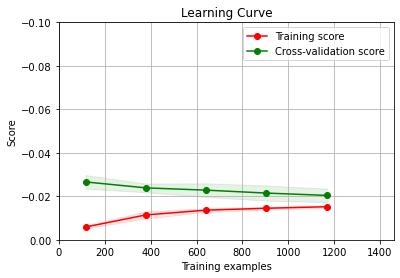

In [283]:
g = plot_learning_curve(gb_reg,"Learning Curve", X_train, y_train)
plt.axis([0, 1460, 0, -.1])                       
plt.show() 

XGB Regressor

In [328]:
xgb_reg = XGBRegressor()
score = cross_val_score(xgb_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_log_error')
score.mean()

-0.018888587911440408

In [329]:
param_grid = {'n_estimators': [200, 250, 300], 'max_depth': [3, 4, 5], 'learning_rate': [0.1, 0.5, 1]}
grid_search = GridSearchCV(xgb_reg, param_grid, cv=5, scoring = 'neg_mean_squared_log_error') 
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [330]:
grid_search.best_score_

-0.01624508168444381

In [ ]:
# Explore Randomized Search

In [331]:
xgb_reg = XGBRegressor(max_depth=1, n_estimators=200, learning_rate=.1)
xgb_reg.fit(X_train,y_train)
y_train_pred = xgb_reg.predict(X_train)
score = -1*mean_squared_log_error(y_train, y_train_pred) 
score

-0.01692778995743965

In [332]:
np.sqrt(-score)

0.13010684054821886

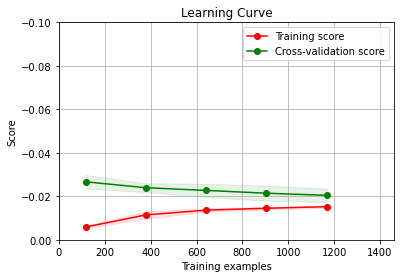

In [333]:
g = plot_learning_curve(gb_reg,"Learning Curve", X_train, y_train)
plt.axis([0, 1460, 0, -.1])                        
plt.show() 

Random Forest

In [290]:
rf_reg = RandomForestRegressor()
score = cross_val_score(rf_reg, X_train, y_train, cv=5, scoring = 'neg_mean_squared_log_error')
score.mean()

-0.020721763653281842

In [310]:
param_grid = {'n_estimators': [600, 700, 800], 'max_depth': [7, 8, 9]}
grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring = 'neg_mean_squared_log_error') 
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'max_depth': 9, 'n_estimators': 600}

In [311]:
grid_search.best_score_

-0.02113253448058331

In [317]:
rf_reg = RandomForestRegressor(n_estimators=500, max_depth=5)
rf_reg.fit(X_train,y_train)
y_train_pred = rf_reg.predict(X_train)
score = -1*mean_squared_log_error(y_train, y_train_pred) 
score

-0.02054774939427204

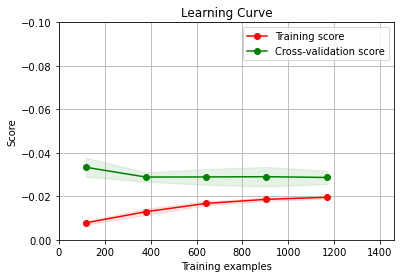

In [318]:
g = plot_learning_curve(rf_reg,"Learning Curve", X_train, y_train)
plt.axis([0, 1460, 0, -.1])                        
plt.show() 

Ensemble

In [321]:
from sklearn.ensemble import VotingRegressor

voting_reg = VotingRegressor(
    estimators=[('gb', gb_reg), ('rf', rf_reg)])

voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(max_depth=1,
                                                       n_estimators=250)),
                            ('rf',
                             RandomForestRegressor(max_depth=5,
                                                   n_estimators=500))])

In [323]:
y_train_pred = voting_reg.predict(X_train)
voting_reg.fit(X_train, y_train)
score = -1*mean_squared_log_error(y, y_train_pred) 
score

-0.01643298220992126

## Test Set Evaluation

Complete datasets

In [ ]:
test_data_array = np.c_[X_test, y_test]

In [ ]:
test_data = pd.DataFrame(trest_data_array, columns=data.columns)

In [ ]:
# Apply any data trasformations to test_data not included in full pipeline.
df_test = prepare(test_data)
X_test = df_test.drop('target', axis=1)
y_test = df_test['target']
X_test = full_pipeline.transform(X_test)

In [ ]:
y_test_pred = voting_clf.predict(X_test)
accuracy_score(y_test, y_test_pred)

### Kaggle Submission (If Required)

In [ ]:
ids = test_data['Id']
# Required transformations of test_data
X_test = prepare(test_data, flex=False)
X_test = full_pipeline.transform(X_test)
predictions = voting_reg.predict(X_test)
output = pd.DataFrame({'Id': ids, 'target': predictions}) 
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")